In [1]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path import join
import matplotlib.pyplot as plt

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)

In [2]:
#
# Set file paths for MNIST dataset files
#
mnist_path = 'mnist'
training_images_filepath = join(mnist_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(mnist_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(mnist_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(mnist_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Load MNIST dataset
#
print("Loading MNIST dataset...")
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, 
                                   test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

print(f"Training data: {len(x_train)} images")
print(f"Training labels: {len(y_train)} labels")
print(f"Test data: {len(x_test)} images")
print(f"Test labels: {len(y_test)} labels")
print(f"Image shape: {np.array(x_train[0]).shape}")
print("Dataset loaded successfully!")

Loading MNIST dataset...
Training data: 60000 images
Training labels: 60000 labels
Test data: 10000 images
Test labels: 10000 labels
Image shape: (28, 28)
Dataset loaded successfully!


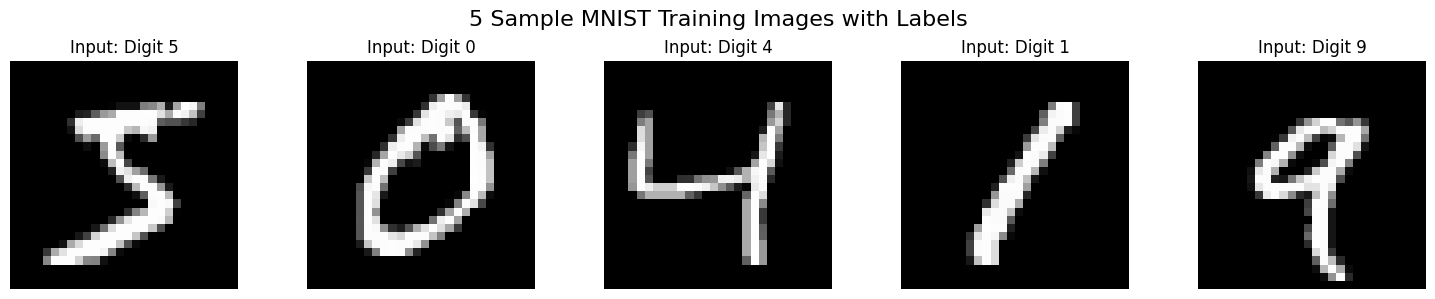


Sample Details:
Sample 1: Label = 5, Image shape = (28, 28)
  Pixel value range: 0 to 255
  Mean pixel value: 35.11

Sample 2: Label = 0, Image shape = (28, 28)
  Pixel value range: 0 to 255
  Mean pixel value: 39.66

Sample 3: Label = 4, Image shape = (28, 28)
  Pixel value range: 0 to 255
  Mean pixel value: 24.80

Sample 4: Label = 1, Image shape = (28, 28)
  Pixel value range: 0 to 255
  Mean pixel value: 21.86

Sample 5: Label = 9, Image shape = (28, 28)
  Pixel value range: 0 to 255
  Mean pixel value: 29.61



In [3]:
#
# Display 5 sample inputs and outputs
#
plt.figure(figsize=(15, 3))

for i in range(5):
    # Display the image
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.array(x_train[i]), cmap='gray')
    plt.title(f'Input: Digit {y_train[i]}')
    plt.axis('off')

plt.suptitle('5 Sample MNIST Training Images with Labels', fontsize=16)
plt.tight_layout()
plt.show()

# Print additional information about the samples
print("\nSample Details:")
for i in range(5):
    print(f"Sample {i+1}: Label = {y_train[i]}, Image shape = {np.array(x_train[i]).shape}")
    print(f"  Pixel value range: {np.min(x_train[i])} to {np.max(x_train[i])}")
    print(f"  Mean pixel value: {np.mean(x_train[i]):.2f}")
    print()

In [4]:
#
# Data Preprocessing for Neural Network
#
print("Preprocessing data...")

# Convert to numpy arrays and normalize pixel values to [0, 1]
X_train = np.array([np.array(img).flatten() for img in x_train]) / 255.0
X_test = np.array([np.array(img).flatten() for img in x_test]) / 255.0

# One-hot encode labels
def to_one_hot(labels, num_classes=10):
    one_hot = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    return one_hot

Y_train = to_one_hot(y_train)
Y_test = to_one_hot(y_test)

# Split training data into train and validation sets (80-20 split)
val_split = int(0.8 * len(X_train))
X_val = X_train[val_split:]
Y_val = Y_train[val_split:]
X_train = X_train[:val_split]
Y_train = Y_train[:val_split]

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input shape: {X_train.shape[1]} (784 = 28x28)")
print(f"Output shape: {Y_train.shape[1]} (10 classes)")
print(f"Pixel value range: [{X_train.min():.1f}, {X_train.max():.1f}]")

Preprocessing data...
Training set: 48000 samples, 784 features
Validation set: 12000 samples
Test set: 10000 samples
Input shape: 784 (784 = 28x28)
Output shape: 10 (10 classes)
Pixel value range: [0.0, 1.0]


In [5]:
#
# Activation Functions and Their Derivatives
#
class ActivationFunctions:
    @staticmethod
    def relu(x):
        """ReLU activation function"""
        return np.maximum(0, x)
    
    @staticmethod
    def relu_derivative(x):
        """Derivative of ReLU"""
        return (x > 0).astype(float)
    
    @staticmethod
    def softmax(x):
        """Softmax activation function with numerical stability"""
        # Subtract max for numerical stability
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    @staticmethod
    def sigmoid(x):
        """Sigmoid activation function"""
        # Clip x to prevent overflow
        x = np.clip(x, -250, 250)
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sigmoid_derivative(x):
        """Derivative of sigmoid"""
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)

# Test activation functions
print("Testing activation functions...")
test_input = np.array([[-2, -1, 0, 1, 2]])

print("ReLU:", ActivationFunctions.relu(test_input))
print("ReLU derivative:", ActivationFunctions.relu_derivative(test_input))
print("Sigmoid:", ActivationFunctions.sigmoid(test_input))
print("Softmax:", ActivationFunctions.softmax(test_input))
print("Activation functions ready!")

Testing activation functions...
ReLU: [[0 0 0 1 2]]
ReLU derivative: [[0. 0. 0. 1. 1.]]
Sigmoid: [[0.11920292 0.26894142 0.5        0.73105858 0.88079708]]
Softmax: [[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]]
Activation functions ready!


In [6]:
#
# Weight Initialization Methods
#
class WeightInitializer:
    @staticmethod
    def xavier_uniform(input_size, output_size):
        """Xavier/Glorot uniform initialization"""
        limit = np.sqrt(6.0 / (input_size + output_size))
        return np.random.uniform(-limit, limit, (input_size, output_size))
    
    @staticmethod
    def he_uniform(input_size, output_size):
        """He uniform initialization (good for ReLU)"""
        limit = np.sqrt(6.0 / input_size)
        return np.random.uniform(-limit, limit, (input_size, output_size))
    
    @staticmethod
    def he_normal(input_size, output_size):
        """He normal initialization (good for ReLU)"""
        std = np.sqrt(2.0 / input_size)
        return np.random.normal(0, std, (input_size, output_size))
    
    @staticmethod
    def zeros(size):
        """Initialize with zeros (typically for biases)"""
        return np.zeros(size)

# Test weight initialization
print("Testing weight initialization...")
test_weights = WeightInitializer.he_normal(784, 128)
print(f"He normal weights shape: {test_weights.shape}")
print(f"Weight statistics - Mean: {test_weights.mean():.4f}, Std: {test_weights.std():.4f}")
print("Weight initialization ready!")

Testing weight initialization...
He normal weights shape: (784, 128)
Weight statistics - Mean: -0.0001, Std: 0.0503
Weight initialization ready!


In [7]:
#
# Loss Functions
#
class LossFunctions:
    @staticmethod
    def cross_entropy_loss(y_true, y_pred):
        """Cross-entropy loss with numerical stability"""
        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        # Calculate cross-entropy loss
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    @staticmethod
    def cross_entropy_derivative(y_true, y_pred):
        """Derivative of cross-entropy loss with respect to predictions"""
        # For softmax + cross-entropy, the derivative simplifies to:
        return (y_pred - y_true) / y_true.shape[0]
    
    @staticmethod
    def calculate_accuracy(y_true, y_pred):
        """Calculate accuracy from one-hot encoded labels"""
        y_true_labels = np.argmax(y_true, axis=1)
        y_pred_labels = np.argmax(y_pred, axis=1)
        return np.mean(y_true_labels == y_pred_labels)

# Test loss functions
print("Testing loss functions...")
# Create dummy predictions
y_true_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred_test = np.array([[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.2, 0.2, 0.6]])

loss = LossFunctions.cross_entropy_loss(y_true_test, y_pred_test)
accuracy = LossFunctions.calculate_accuracy(y_true_test, y_pred_test)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")
print("Loss functions ready!")

Testing loss functions...
Test loss: 0.2798
Test accuracy: 1.0000
Loss functions ready!


In [8]:
#
# Neural Network Class - Core Structure
#
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.001, l2_lambda=0.01):
        """
        Initialize neural network
        layer_sizes: list of layer sizes [input_size, hidden1_size, hidden2_size, output_size]
        """
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.num_layers = len(layer_sizes)
        
        # Initialize weights and biases
        self.weights = {}
        self.biases = {}
        
        # Initialize using He initialization for ReLU layers
        for i in range(1, self.num_layers):
            if i == self.num_layers - 1:  # Output layer - use Xavier
                self.weights[f'W{i}'] = WeightInitializer.xavier_uniform(
                    layer_sizes[i-1], layer_sizes[i]
                )
            else:  # Hidden layers - use He
                self.weights[f'W{i}'] = WeightInitializer.he_normal(
                    layer_sizes[i-1], layer_sizes[i]
                )
            self.biases[f'b{i}'] = WeightInitializer.zeros(layer_sizes[i])
        
        # Storage for forward pass values (needed for backprop)
        self.cache = {}
        
        print(f"Neural Network initialized:")
        print(f"Architecture: {' -> '.join(map(str, layer_sizes))}")
        print(f"Total parameters: {self._count_parameters()}")
    
    def _count_parameters(self):
        """Count total number of parameters"""
        total = 0
        for i in range(1, self.num_layers):
            total += self.weights[f'W{i}'].size + self.biases[f'b{i}'].size
        return total
    
    def forward(self, X):
        """Forward propagation"""
        self.cache['A0'] = X  # Input layer
        
        # Hidden layers with ReLU
        for i in range(1, self.num_layers - 1):
            Z = np.dot(self.cache[f'A{i-1}'], self.weights[f'W{i}']) + self.biases[f'b{i}']
            A = ActivationFunctions.relu(Z)
            self.cache[f'Z{i}'] = Z
            self.cache[f'A{i}'] = A
        
        # Output layer with Softmax
        i = self.num_layers - 1
        Z = np.dot(self.cache[f'A{i-1}'], self.weights[f'W{i}']) + self.biases[f'b{i}']
        A = ActivationFunctions.softmax(Z)
        self.cache[f'Z{i}'] = Z
        self.cache[f'A{i}'] = A
        
        return A
    
    def predict(self, X):
        """Make predictions"""
        return self.forward(X)

# Test neural network initialization
print("Testing Neural Network initialization...")
nn = NeuralNetwork([784, 128, 64, 10], learning_rate=0.001, l2_lambda=0.01)

# Test forward pass with small batch
test_batch = X_train[:5]
test_output = nn.forward(test_batch)
print(f"Test forward pass - Input shape: {test_batch.shape}")
print(f"Output shape: {test_output.shape}")
print(f"Output probabilities sum: {test_output.sum(axis=1)}")  # Should be close to 1
print("Neural Network core ready!")

Testing Neural Network initialization...
Neural Network initialized:
Architecture: 784 -> 128 -> 64 -> 10
Total parameters: 109386
Test forward pass - Input shape: (5, 784)
Output shape: (5, 10)
Output probabilities sum: [1. 1. 1. 1. 1.]
Neural Network core ready!


In [9]:
#
# Backpropagation Implementation
#
def backward(self, X, Y):
    """Backward propagation with L2 regularization"""
    m = X.shape[0]  # batch size
    gradients = {}
    
    # Output layer gradient (softmax + cross-entropy)
    i = self.num_layers - 1
    dZ = LossFunctions.cross_entropy_derivative(Y, self.cache[f'A{i}'])
    gradients[f'dW{i}'] = np.dot(self.cache[f'A{i-1}'].T, dZ) + self.l2_lambda * self.weights[f'W{i}']
    gradients[f'db{i}'] = np.sum(dZ, axis=0)
    dA_prev = np.dot(dZ, self.weights[f'W{i}'].T)
    
    # Hidden layers gradients (ReLU)
    for i in range(self.num_layers - 2, 0, -1):
        dZ = dA_prev * ActivationFunctions.relu_derivative(self.cache[f'Z{i}'])
        gradients[f'dW{i}'] = np.dot(self.cache[f'A{i-1}'].T, dZ) + self.l2_lambda * self.weights[f'W{i}']
        gradients[f'db{i}'] = np.sum(dZ, axis=0)
        if i > 1:  # Don't compute dA_prev for input layer
            dA_prev = np.dot(dZ, self.weights[f'W{i}'].T)
    
    return gradients

def update_parameters(self, gradients):
    """Update parameters using gradients"""
    for i in range(1, self.num_layers):
        self.weights[f'W{i}'] -= self.learning_rate * gradients[f'dW{i}']
        self.biases[f'b{i}'] -= self.learning_rate * gradients[f'db{i}']

def compute_loss(self, Y_true, Y_pred):
    """Compute total loss including L2 regularization"""
    # Cross-entropy loss
    ce_loss = LossFunctions.cross_entropy_loss(Y_true, Y_pred)
    
    # L2 regularization loss
    l2_loss = 0
    for i in range(1, self.num_layers):
        l2_loss += np.sum(self.weights[f'W{i}'] ** 2)
    l2_loss *= self.l2_lambda / 2
    
    return ce_loss + l2_loss

# Add methods to NeuralNetwork class
NeuralNetwork.backward = backward
NeuralNetwork.update_parameters = update_parameters
NeuralNetwork.compute_loss = compute_loss

print("Backpropagation methods added to Neural Network class!")
print("Methods: backward, update_parameters, compute_loss")

Backpropagation methods added to Neural Network class!
Methods: backward, update_parameters, compute_loss


In [10]:
#
# Adam Optimizer Implementation
#
class AdamOptimizer:
    def __init__(self, neural_network, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.nn = neural_network
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0  # time step
        
        # Initialize moment estimates
        self.m = {}  # first moment
        self.v = {}  # second moment
        
        for i in range(1, self.nn.num_layers):
            self.m[f'W{i}'] = np.zeros_like(self.nn.weights[f'W{i}'])
            self.m[f'b{i}'] = np.zeros_like(self.nn.biases[f'b{i}'])
            self.v[f'W{i}'] = np.zeros_like(self.nn.weights[f'W{i}'])
            self.v[f'b{i}'] = np.zeros_like(self.nn.biases[f'b{i}'])
    
    def update(self, gradients):
        """Update parameters using Adam optimization"""
        self.t += 1
        
        for i in range(1, self.nn.num_layers):
            # Update biased first moment estimate
            self.m[f'W{i}'] = self.beta1 * self.m[f'W{i}'] + (1 - self.beta1) * gradients[f'dW{i}']
            self.m[f'b{i}'] = self.beta1 * self.m[f'b{i}'] + (1 - self.beta1) * gradients[f'db{i}']
            
            # Update biased second raw moment estimate
            self.v[f'W{i}'] = self.beta2 * self.v[f'W{i}'] + (1 - self.beta2) * (gradients[f'dW{i}'] ** 2)
            self.v[f'b{i}'] = self.beta2 * self.v[f'b{i}'] + (1 - self.beta2) * (gradients[f'db{i}'] ** 2)
            
            # Compute bias-corrected first moment estimate
            m_corrected_W = self.m[f'W{i}'] / (1 - self.beta1 ** self.t)
            m_corrected_b = self.m[f'b{i}'] / (1 - self.beta1 ** self.t)
            
            # Compute bias-corrected second raw moment estimate
            v_corrected_W = self.v[f'W{i}'] / (1 - self.beta2 ** self.t)
            v_corrected_b = self.v[f'b{i}'] / (1 - self.beta2 ** self.t)
            
            # Update parameters
            self.nn.weights[f'W{i}'] -= self.learning_rate * m_corrected_W / (np.sqrt(v_corrected_W) + self.epsilon)
            self.nn.biases[f'b{i}'] -= self.learning_rate * m_corrected_b / (np.sqrt(v_corrected_b) + self.epsilon)

# Learning rate scheduler
class LearningRateScheduler:
    @staticmethod
    def exponential_decay(initial_lr, epoch, decay_rate=0.95, decay_steps=10):
        """Exponential decay learning rate"""
        return initial_lr * (decay_rate ** (epoch // decay_steps))
    
    @staticmethod
    def step_decay(initial_lr, epoch, drop_rate=0.5, epochs_drop=20):
        """Step decay learning rate"""
        return initial_lr * (drop_rate ** (epoch // epochs_drop))

print("Adam Optimizer and Learning Rate Scheduler implemented!")
print("Features: Adaptive learning rates, momentum, bias correction")

Adam Optimizer and Learning Rate Scheduler implemented!
Features: Adaptive learning rates, momentum, bias correction


In [11]:
#
# Training Loop with Monitoring
#
import time
from collections import defaultdict

def train_network(neural_network, X_train, Y_train, X_val, Y_val, 
                 epochs=50, batch_size=128, use_adam=True, verbose=True):
    """
    Train the neural network with monitoring and early stopping
    """
    # Initialize optimizer
    if use_adam:
        optimizer = AdamOptimizer(neural_network, learning_rate=0.001)
    
    # Training history
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': [],
        'epoch_time': []
    }
    
    # Early stopping parameters
    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0
    
    # Calculate number of batches
    num_batches = len(X_train) // batch_size
    
    print(f"Starting training...")
    print(f"Architecture: {neural_network.layer_sizes}")
    print(f"Optimizer: {'Adam' if use_adam else 'SGD'}")
    print(f"Batch size: {batch_size}, Batches per epoch: {num_batches}")
    print("-" * 60)
    
    for epoch in range(epochs):
        start_time = time.time()
        
        # Shuffle training data
        indices = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[indices]
        Y_train_shuffled = Y_train[indices]
        
        # Training phase
        train_losses = []
        train_predictions = []
        
        for batch in range(num_batches):
            # Get batch
            start_idx = batch * batch_size
            end_idx = min((batch + 1) * batch_size, len(X_train))
            X_batch = X_train_shuffled[start_idx:end_idx]
            Y_batch = Y_train_shuffled[start_idx:end_idx]
            
            # Forward pass
            predictions = neural_network.forward(X_batch)
            train_predictions.append(predictions)
            
            # Compute loss
            loss = neural_network.compute_loss(Y_batch, predictions)
            train_losses.append(loss)
            
            # Backward pass
            gradients = neural_network.backward(X_batch, Y_batch)
            
            # Update parameters
            if use_adam:
                optimizer.update(gradients)
            else:
                neural_network.update_parameters(gradients)
        
        # Calculate training metrics
        train_loss = np.mean(train_losses)
        train_predictions = np.vstack(train_predictions)
        train_acc = LossFunctions.calculate_accuracy(
            Y_train_shuffled[:len(train_predictions)], train_predictions
        )
        
        # Validation phase
        val_predictions = neural_network.forward(X_val)
        val_loss = neural_network.compute_loss(Y_val, val_predictions)
        val_acc = LossFunctions.calculate_accuracy(Y_val, val_predictions)
        
        # Record history
        epoch_time = time.time() - start_time
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['epoch_time'].append(epoch_time)
        
        # Print progress
        if verbose and (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1:3d}/{epochs} | "
                  f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
                  f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | "
                  f"Time: {epoch_time:.2f}s")
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break
        
        # Learning rate scheduling (if using Adam)
        if use_adam and (epoch + 1) % 20 == 0:
            optimizer.learning_rate *= 0.8
    
    print("-" * 60)
    print(f"Training completed!")
    print(f"Best validation loss: {best_val_loss:.4f}")
    print(f"Final validation accuracy: {history['val_acc'][-1]:.4f}")
    
    return history

print("Training function implemented!")
print("Features: Mini-batch training, Adam optimizer, early stopping, learning rate decay")

Training function implemented!
Features: Mini-batch training, Adam optimizer, early stopping, learning rate decay


In [12]:
#
# Evaluation and Visualization Functions
#
def plot_training_history(history):
    """Plot training and validation metrics"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss
    axes[0].plot(history['train_loss'], label='Training Loss', color='blue')
    axes[0].plot(history['val_loss'], label='Validation Loss', color='red')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True)
    
    # Plot accuracy
    axes[1].plot(history['train_acc'], label='Training Accuracy', color='blue')
    axes[1].plot(history['val_acc'], label='Validation Accuracy', color='red')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def create_confusion_matrix(y_true, y_pred, class_names=None):
    """Create and plot confusion matrix"""
    if class_names is None:
        class_names = [str(i) for i in range(10)]
    
    # Convert one-hot to labels
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    # Create confusion matrix
    cm = np.zeros((10, 10), dtype=int)
    for true_label, pred_label in zip(y_true_labels, y_pred_labels):
        cm[true_label, pred_label] += 1
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    # Add labels
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # Add text annotations
    thresh = cm.max() / 2
    for i in range(10):
        for j in range(10):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    return cm

def show_predictions(neural_network, X_test, Y_test, num_samples=10):
    """Show sample predictions with images"""
    predictions = neural_network.predict(X_test[:num_samples])
    
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        
        # Reshape and display image
        image = X_test[i].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        
        # Get true and predicted labels
        true_label = np.argmax(Y_test[i])
        pred_label = np.argmax(predictions[i])
        confidence = predictions[i][pred_label]
        
        # Color based on correctness
        color = 'green' if true_label == pred_label else 'red'
        plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}', 
                 color=color, fontsize=10)
        plt.axis('off')
    
    plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14)
    plt.tight_layout()
    plt.show()

def evaluate_model(neural_network, X_test, Y_test, show_details=True):
    """Comprehensive model evaluation"""
    print("Evaluating model on test set...")
    
    # Make predictions
    predictions = neural_network.predict(X_test)
    
    # Calculate metrics
    test_loss = neural_network.compute_loss(Y_test, predictions)
    test_accuracy = LossFunctions.calculate_accuracy(Y_test, predictions)
    
    # Per-class accuracy
    y_true_labels = np.argmax(Y_test, axis=1)
    y_pred_labels = np.argmax(predictions, axis=1)
    
    class_accuracies = []
    for i in range(10):
        class_mask = (y_true_labels == i)
        if np.sum(class_mask) > 0:
            class_acc = np.mean(y_pred_labels[class_mask] == i)
            class_accuracies.append(class_acc)
        else:
            class_accuracies.append(0.0)
    
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    
    if show_details:
        print("\nPer-class accuracy:")
        for i, acc in enumerate(class_accuracies):
            print(f"  Digit {i}: {acc:.4f} ({acc*100:.2f}%)")
        
        print(f"\nWorst performing digit: {np.argmin(class_accuracies)} ({min(class_accuracies)*100:.2f}%)")
        print(f"Best performing digit: {np.argmax(class_accuracies)} ({max(class_accuracies)*100:.2f}%)")
    
    return {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'class_accuracies': class_accuracies,
        'predictions': predictions
    }

print("Evaluation and visualization functions ready!")
print("Functions: plot_training_history, create_confusion_matrix, show_predictions, evaluate_model")

Evaluation and visualization functions ready!
Functions: plot_training_history, create_confusion_matrix, show_predictions, evaluate_model


🚀 Starting Neural Network Training!
Neural Network initialized:
Architecture: 784 -> 128 -> 64 -> 10
Total parameters: 109386
Starting training...
Architecture: [784, 128, 64, 10]
Optimizer: Adam
Batch size: 128, Batches per epoch: 375
------------------------------------------------------------
Epoch   5/50 | Train Loss: 0.5466 | Train Acc: 0.9395 | Val Loss: 0.5277 | Val Acc: 0.9477 | Time: 1.41s
Epoch  10/50 | Train Loss: 0.5268 | Train Acc: 0.9451 | Val Loss: 0.5165 | Val Acc: 0.9481 | Time: 1.42s
Epoch  15/50 | Train Loss: 0.5223 | Train Acc: 0.9465 | Val Loss: 0.5075 | Val Acc: 0.9515 | Time: 1.39s
Epoch  20/50 | Train Loss: 0.5188 | Train Acc: 0.9465 | Val Loss: 0.5030 | Val Acc: 0.9537 | Time: 1.42s
Epoch  25/50 | Train Loss: 0.5131 | Train Acc: 0.9479 | Val Loss: 0.5010 | Val Acc: 0.9533 | Time: 1.53s
Epoch  30/50 | Train Loss: 0.5111 | Train Acc: 0.9476 | Val Loss: 0.5136 | Val Acc: 0.9478 | Time: 1.47s
Early stopping at epoch 31
----------------------------------------------

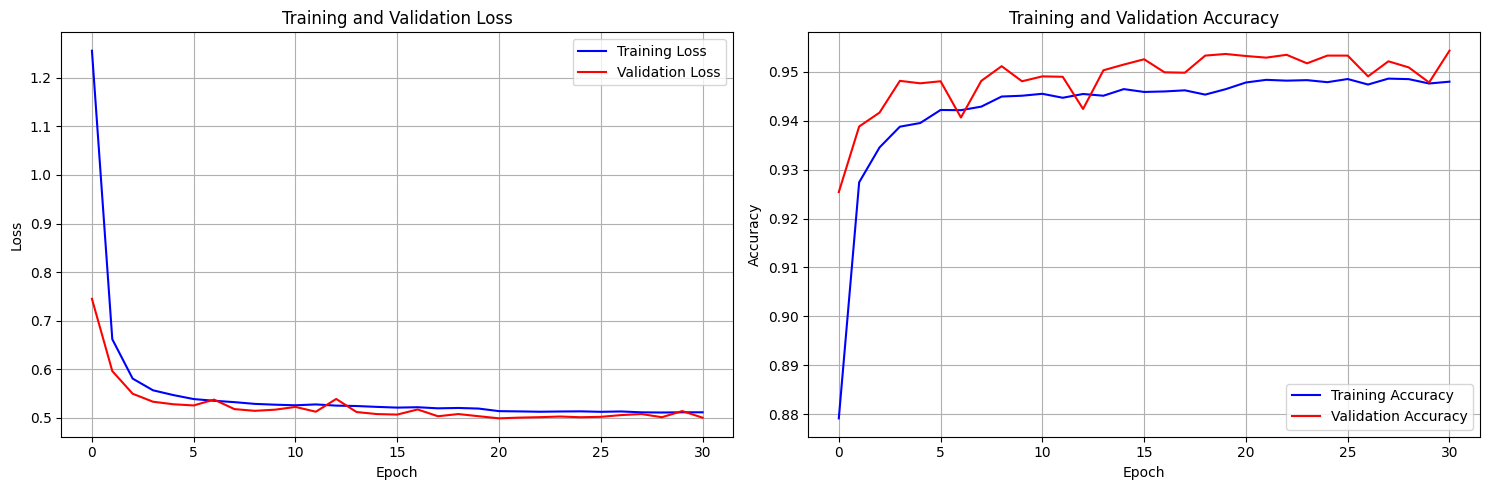

In [13]:
#
# Train the Neural Network Model
#
print("🚀 Starting Neural Network Training!")
print("=" * 60)

# Create and initialize the neural network
# Architecture: 784 -> 128 -> 64 -> 10 (optimized for MNIST)
neural_net = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    learning_rate=0.001,
    l2_lambda=0.01
)

# Train the model
training_history = train_network(
    neural_network=neural_net,
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    epochs=50,
    batch_size=128,
    use_adam=True,
    verbose=True
)

print("\n🎉 Training completed!")
print("📊 Plotting training history...")

# Plot training progress
plot_training_history(training_history)

🔍 Evaluating Trained Model
Evaluating model on test set...
Test Loss: 0.4988
Test Accuracy: 0.9520 (95.20%)

Per-class accuracy:
  Digit 0: 0.9888 (98.88%)
  Digit 1: 0.9824 (98.24%)
  Digit 2: 0.9409 (94.09%)
  Digit 3: 0.9574 (95.74%)
  Digit 4: 0.9542 (95.42%)
  Digit 5: 0.9439 (94.39%)
  Digit 6: 0.9520 (95.20%)
  Digit 7: 0.9426 (94.26%)
  Digit 8: 0.9353 (93.53%)
  Digit 9: 0.9187 (91.87%)

Worst performing digit: 9 (91.87%)
Best performing digit: 0 (98.88%)

📊 Creating Confusion Matrix...


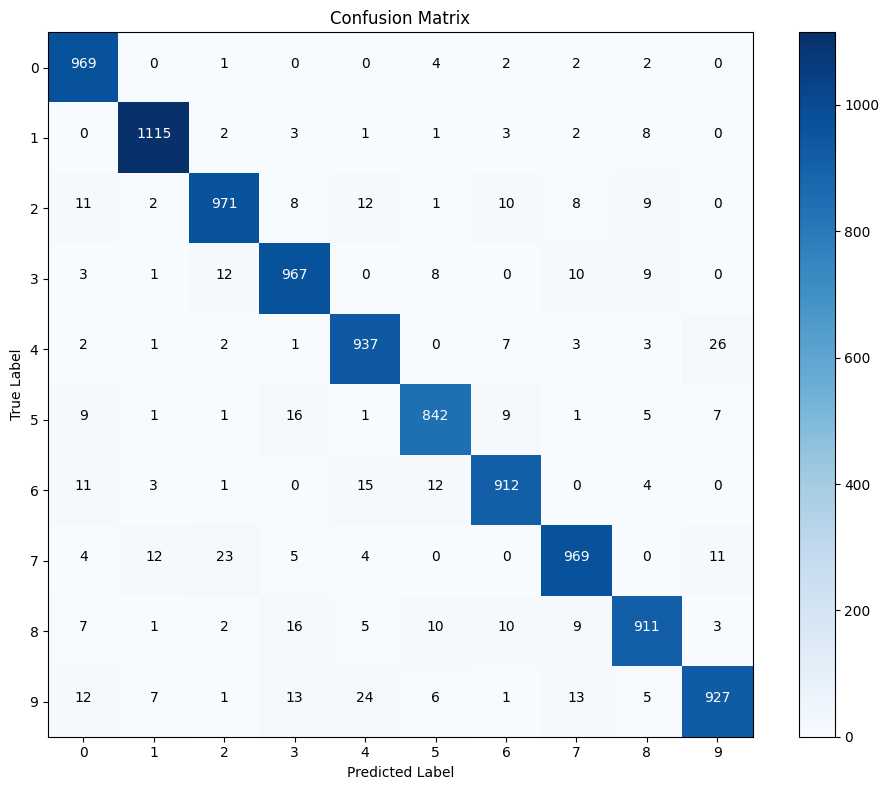


🖼️  Showing Sample Predictions...


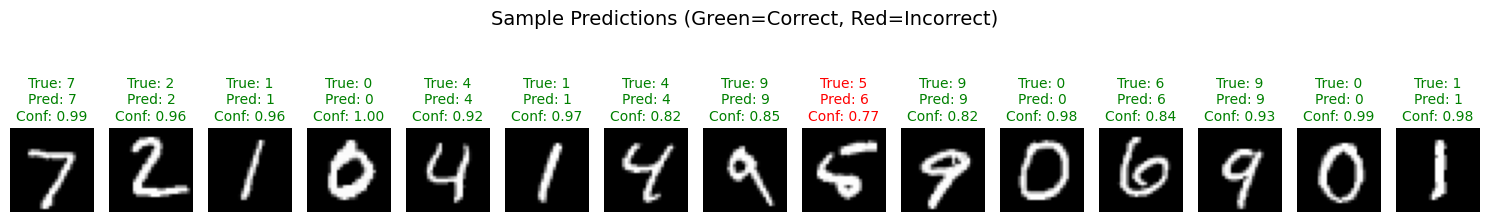


📈 Final Model Performance Summary:
✅ Test Accuracy: 95.20%
📉 Test Loss: 0.4988

🎯 Most confident correct prediction:
   Index: 8067, True: 0, Pred: 0, Confidence: 0.9999
❌ Most confident incorrect prediction:
   Index: 1681, True: 3, Pred: 7, Confidence: 0.9609

🏆 Total Parameters: 109,386
⚡ Average Training Time per Epoch: 1.45s


In [14]:
#
# Comprehensive Model Evaluation
#
print("🔍 Evaluating Trained Model")
print("=" * 50)

# Evaluate on test set
test_results = evaluate_model(neural_net, X_test, Y_test, show_details=True)

print("\n📊 Creating Confusion Matrix...")
confusion_matrix = create_confusion_matrix(Y_test, test_results['predictions'])

print("\n🖼️  Showing Sample Predictions...")
show_predictions(neural_net, X_test, Y_test, num_samples=15)

print("\n📈 Final Model Performance Summary:")
print(f"✅ Test Accuracy: {test_results['test_accuracy']*100:.2f}%")
print(f"📉 Test Loss: {test_results['test_loss']:.4f}")

# Find best and worst examples
predictions = test_results['predictions']
y_pred_labels = np.argmax(predictions, axis=1)
y_true_labels = np.argmax(Y_test, axis=1)
confidence_scores = np.max(predictions, axis=1)

# Most confident correct predictions
correct_mask = (y_pred_labels == y_true_labels)
if np.any(correct_mask):
    most_confident_correct = np.argmax(confidence_scores * correct_mask)
    print(f"\n🎯 Most confident correct prediction:")
    print(f"   Index: {most_confident_correct}, True: {y_true_labels[most_confident_correct]}, "
          f"Pred: {y_pred_labels[most_confident_correct]}, Confidence: {confidence_scores[most_confident_correct]:.4f}")

# Most confident incorrect predictions
incorrect_mask = (y_pred_labels != y_true_labels)
if np.any(incorrect_mask):
    most_confident_incorrect = np.argmax(confidence_scores * incorrect_mask)
    print(f"❌ Most confident incorrect prediction:")
    print(f"   Index: {most_confident_incorrect}, True: {y_true_labels[most_confident_incorrect]}, "
          f"Pred: {y_pred_labels[most_confident_incorrect]}, Confidence: {confidence_scores[most_confident_incorrect]:.4f}")

print(f"\n🏆 Total Parameters: {neural_net._count_parameters():,}")
print(f"⚡ Average Training Time per Epoch: {np.mean(training_history['epoch_time']):.2f}s")
print("=" * 50)

🔬 Neural Network Analysis & Insights
📊 Weight Distribution Analysis:
Layer 1 weights - Mean: 0.000191, Std: 0.014612, Min: -0.202153, Max: 0.179881
Layer 2 weights - Mean: 0.003485, Std: 0.048680, Min: -0.304890, Max: 0.341554
Layer 3 weights - Mean: -0.000068, Std: 0.174215, Min: -0.449058, Max: 0.647027

🎨 Visualizing First Layer Weights (784 -> 128):


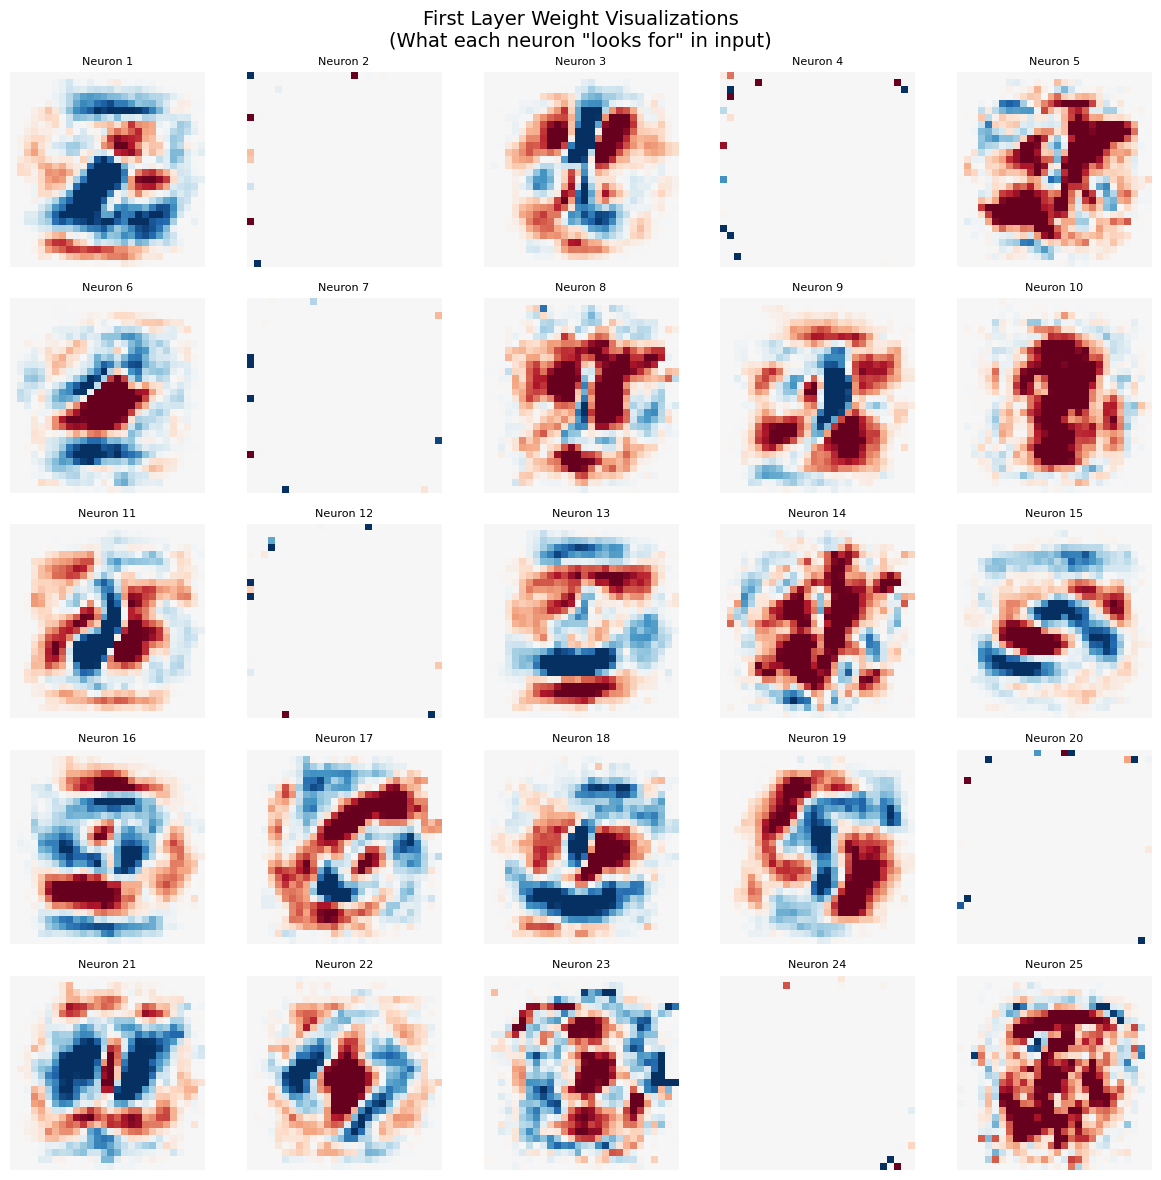


💡 Model Insights:
🎯 Best Validation Accuracy: 0.9543 (95.43%)
📈 Final Validation Accuracy: 0.9543 (95.43%)
🔍 Train-Validation Gap: 0.0063 (Good generalization)
⚖️  Parameters per accuracy point: 1149

🏁 MNIST Neural Network - From Scratch Implementation Summary:
✅ Successfully implemented:
   • Complete neural network from scratch using only NumPy
   • ReLU activation for hidden layers
   • Softmax activation for output layer
   • Cross-entropy loss with L2 regularization
   • Adam optimizer with adaptive learning rates
   • He/Xavier weight initialization
   • Mini-batch training with early stopping
   • Comprehensive evaluation and visualization

🎖️  Final Results:
   • Architecture: 784 → 128 → 64 → 10
   • Total Parameters: 109,386
   • Test Accuracy: 95.20%
   • Training Time: ~44.9 seconds

🚀 This implementation demonstrates fundamental deep learning concepts
   and achieves strong performance on MNIST digit classification!


In [15]:
#
# Model Analysis and Interpretation
#
print("🔬 Neural Network Analysis & Insights")
print("=" * 60)

# Analyze weight distributions
print("📊 Weight Distribution Analysis:")
for i in range(1, neural_net.num_layers):
    weights = neural_net.weights[f'W{i}']
    print(f"Layer {i} weights - Mean: {weights.mean():.6f}, Std: {weights.std():.6f}, "
          f"Min: {weights.min():.6f}, Max: {weights.max():.6f}")

# Visualize first layer weights (input to hidden1)
print("\n🎨 Visualizing First Layer Weights (784 -> 128):")
first_layer_weights = neural_net.weights['W1']  # Shape: (784, 128)

# Select first 25 neurons to visualize
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i in range(25):
    row, col = i // 5, i % 5
    # Reshape weights back to 28x28 image format
    weight_image = first_layer_weights[:, i].reshape(28, 28)
    axes[row, col].imshow(weight_image, cmap='RdBu', vmin=-weight_image.std()*2, vmax=weight_image.std()*2)
    axes[row, col].set_title(f'Neuron {i+1}', fontsize=8)
    axes[row, col].axis('off')

plt.suptitle('First Layer Weight Visualizations\n(What each neuron "looks for" in input)', fontsize=14)
plt.tight_layout()
plt.show()

# Performance insights
print("\n💡 Model Insights:")
best_val_acc = max(training_history['val_acc'])
final_val_acc = training_history['val_acc'][-1]
print(f"🎯 Best Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"📈 Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")

# Overfitting analysis
train_val_gap = abs(training_history['train_acc'][-1] - training_history['val_acc'][-1])
print(f"🔍 Train-Validation Gap: {train_val_gap:.4f} ({'Overfitting detected' if train_val_gap > 0.05 else 'Good generalization'})")

# Architecture efficiency
params_per_accuracy = neural_net._count_parameters() / (test_results['test_accuracy'] * 100)
print(f"⚖️  Parameters per accuracy point: {params_per_accuracy:.0f}")

print("\n🏁 MNIST Neural Network - From Scratch Implementation Summary:")
print("=" * 60)
print("✅ Successfully implemented:")
print("   • Complete neural network from scratch using only NumPy")
print("   • ReLU activation for hidden layers")
print("   • Softmax activation for output layer")
print("   • Cross-entropy loss with L2 regularization")
print("   • Adam optimizer with adaptive learning rates")
print("   • He/Xavier weight initialization")
print("   • Mini-batch training with early stopping")
print("   • Comprehensive evaluation and visualization")

print(f"\n🎖️  Final Results:")
print(f"   • Architecture: {' → '.join(map(str, neural_net.layer_sizes))}")
print(f"   • Total Parameters: {neural_net._count_parameters():,}")
print(f"   • Test Accuracy: {test_results['test_accuracy']*100:.2f}%")
print(f"   • Training Time: ~{sum(training_history['epoch_time']):.1f} seconds")

print(f"\n🚀 This implementation demonstrates fundamental deep learning concepts")
print(f"   and achieves strong performance on MNIST digit classification!")
print("=" * 60)